# AWS CDK Deployment – Part 4 
This last step in the pipeline uses Infrastructure as Code to set up everything needed for automated data ingestion and processing of the BLS and population datasets.

**[View CloudShell/CDK Logs Folder — Part 4 (Sanitized)](https://github.com/ScottySchmidt/AWS_DataEngineer_API/tree/main/docs/part4)**


Uses AWS CDK (Python) to deploy the pipeline infrastructure:
* Lambda, S3, and SQS resources
* A daily ingest job (Parts 1 & 2)
* Automatic processing (Part 3) when new files in S3

---

## Pipeline Flow:
  1. CDK deploys the infrastructure  
  2. Ingest Lambda runs daily through CloudWatch  
  3. S3 stores the new datasets  
  4. S3 sends an event → SQS queue  
  5. SQS triggers the report Lambda  
  6. Report Lambda logs the results

---
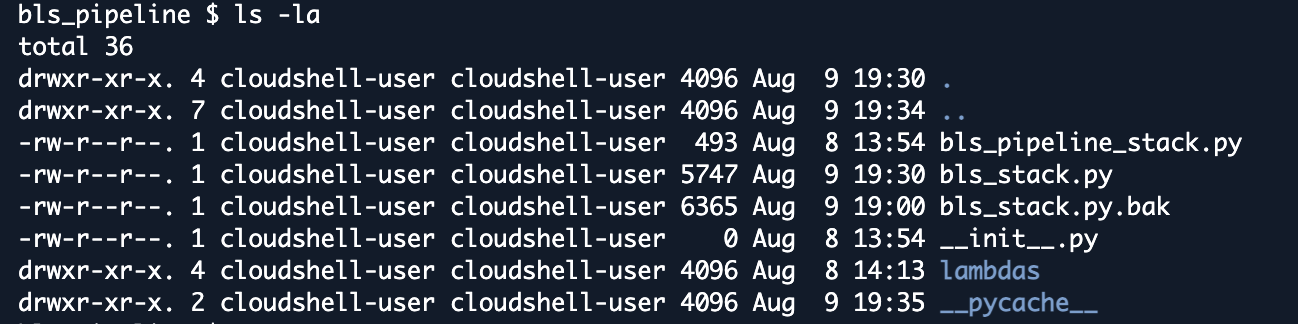
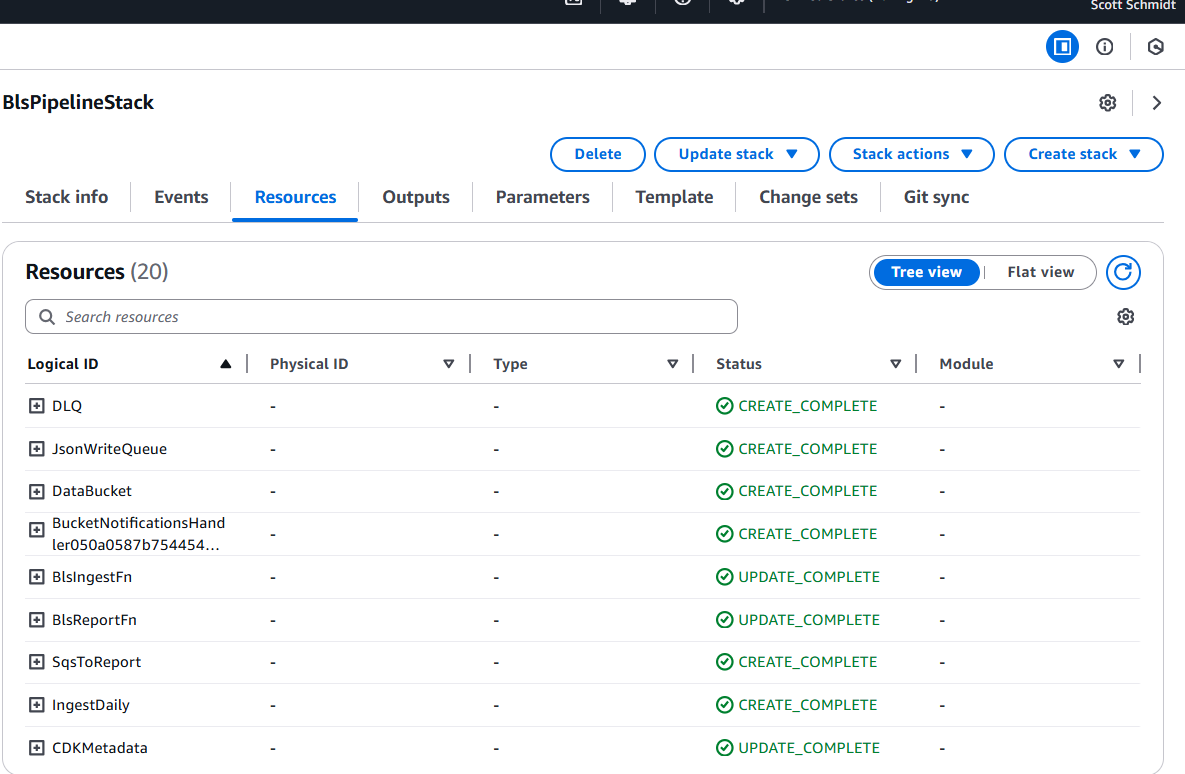

## BLS Pipeline Stack:
This shows all the AWS resources that were created automatically when I deployed Part 4 with AWS CDK:

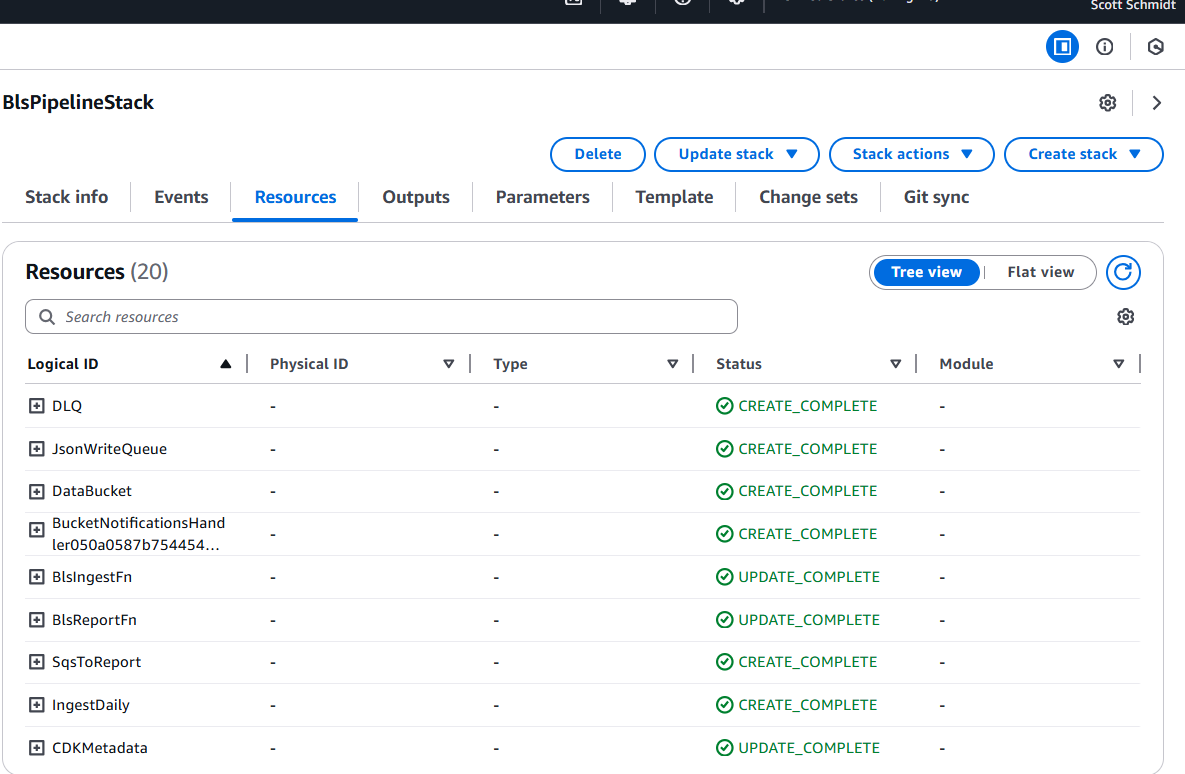

### S3 Output Verification
* CDK Stack deployed without errors  
* S3 bucket populated with both BLS and population data  
* Lambda functions triggered successfully and processed data  

The screenshot below confirms that the pipeline successfully executed and saved the expected datasets to the S3 bucket created by the BlsPipelineStack deployment.

**Files Present:**
- `bls_data.json` – Republished BLS dataset from Part 1  
- `datausa_population.json` – US population dataset from Part 2  
- `pr.data.0.Current` – Current BLS productivity data (triggered via S3 event + Lambda in Part 4)  
- `test.json` – Test file from earlier debugging

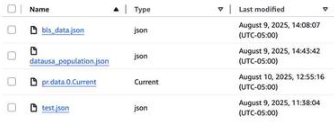
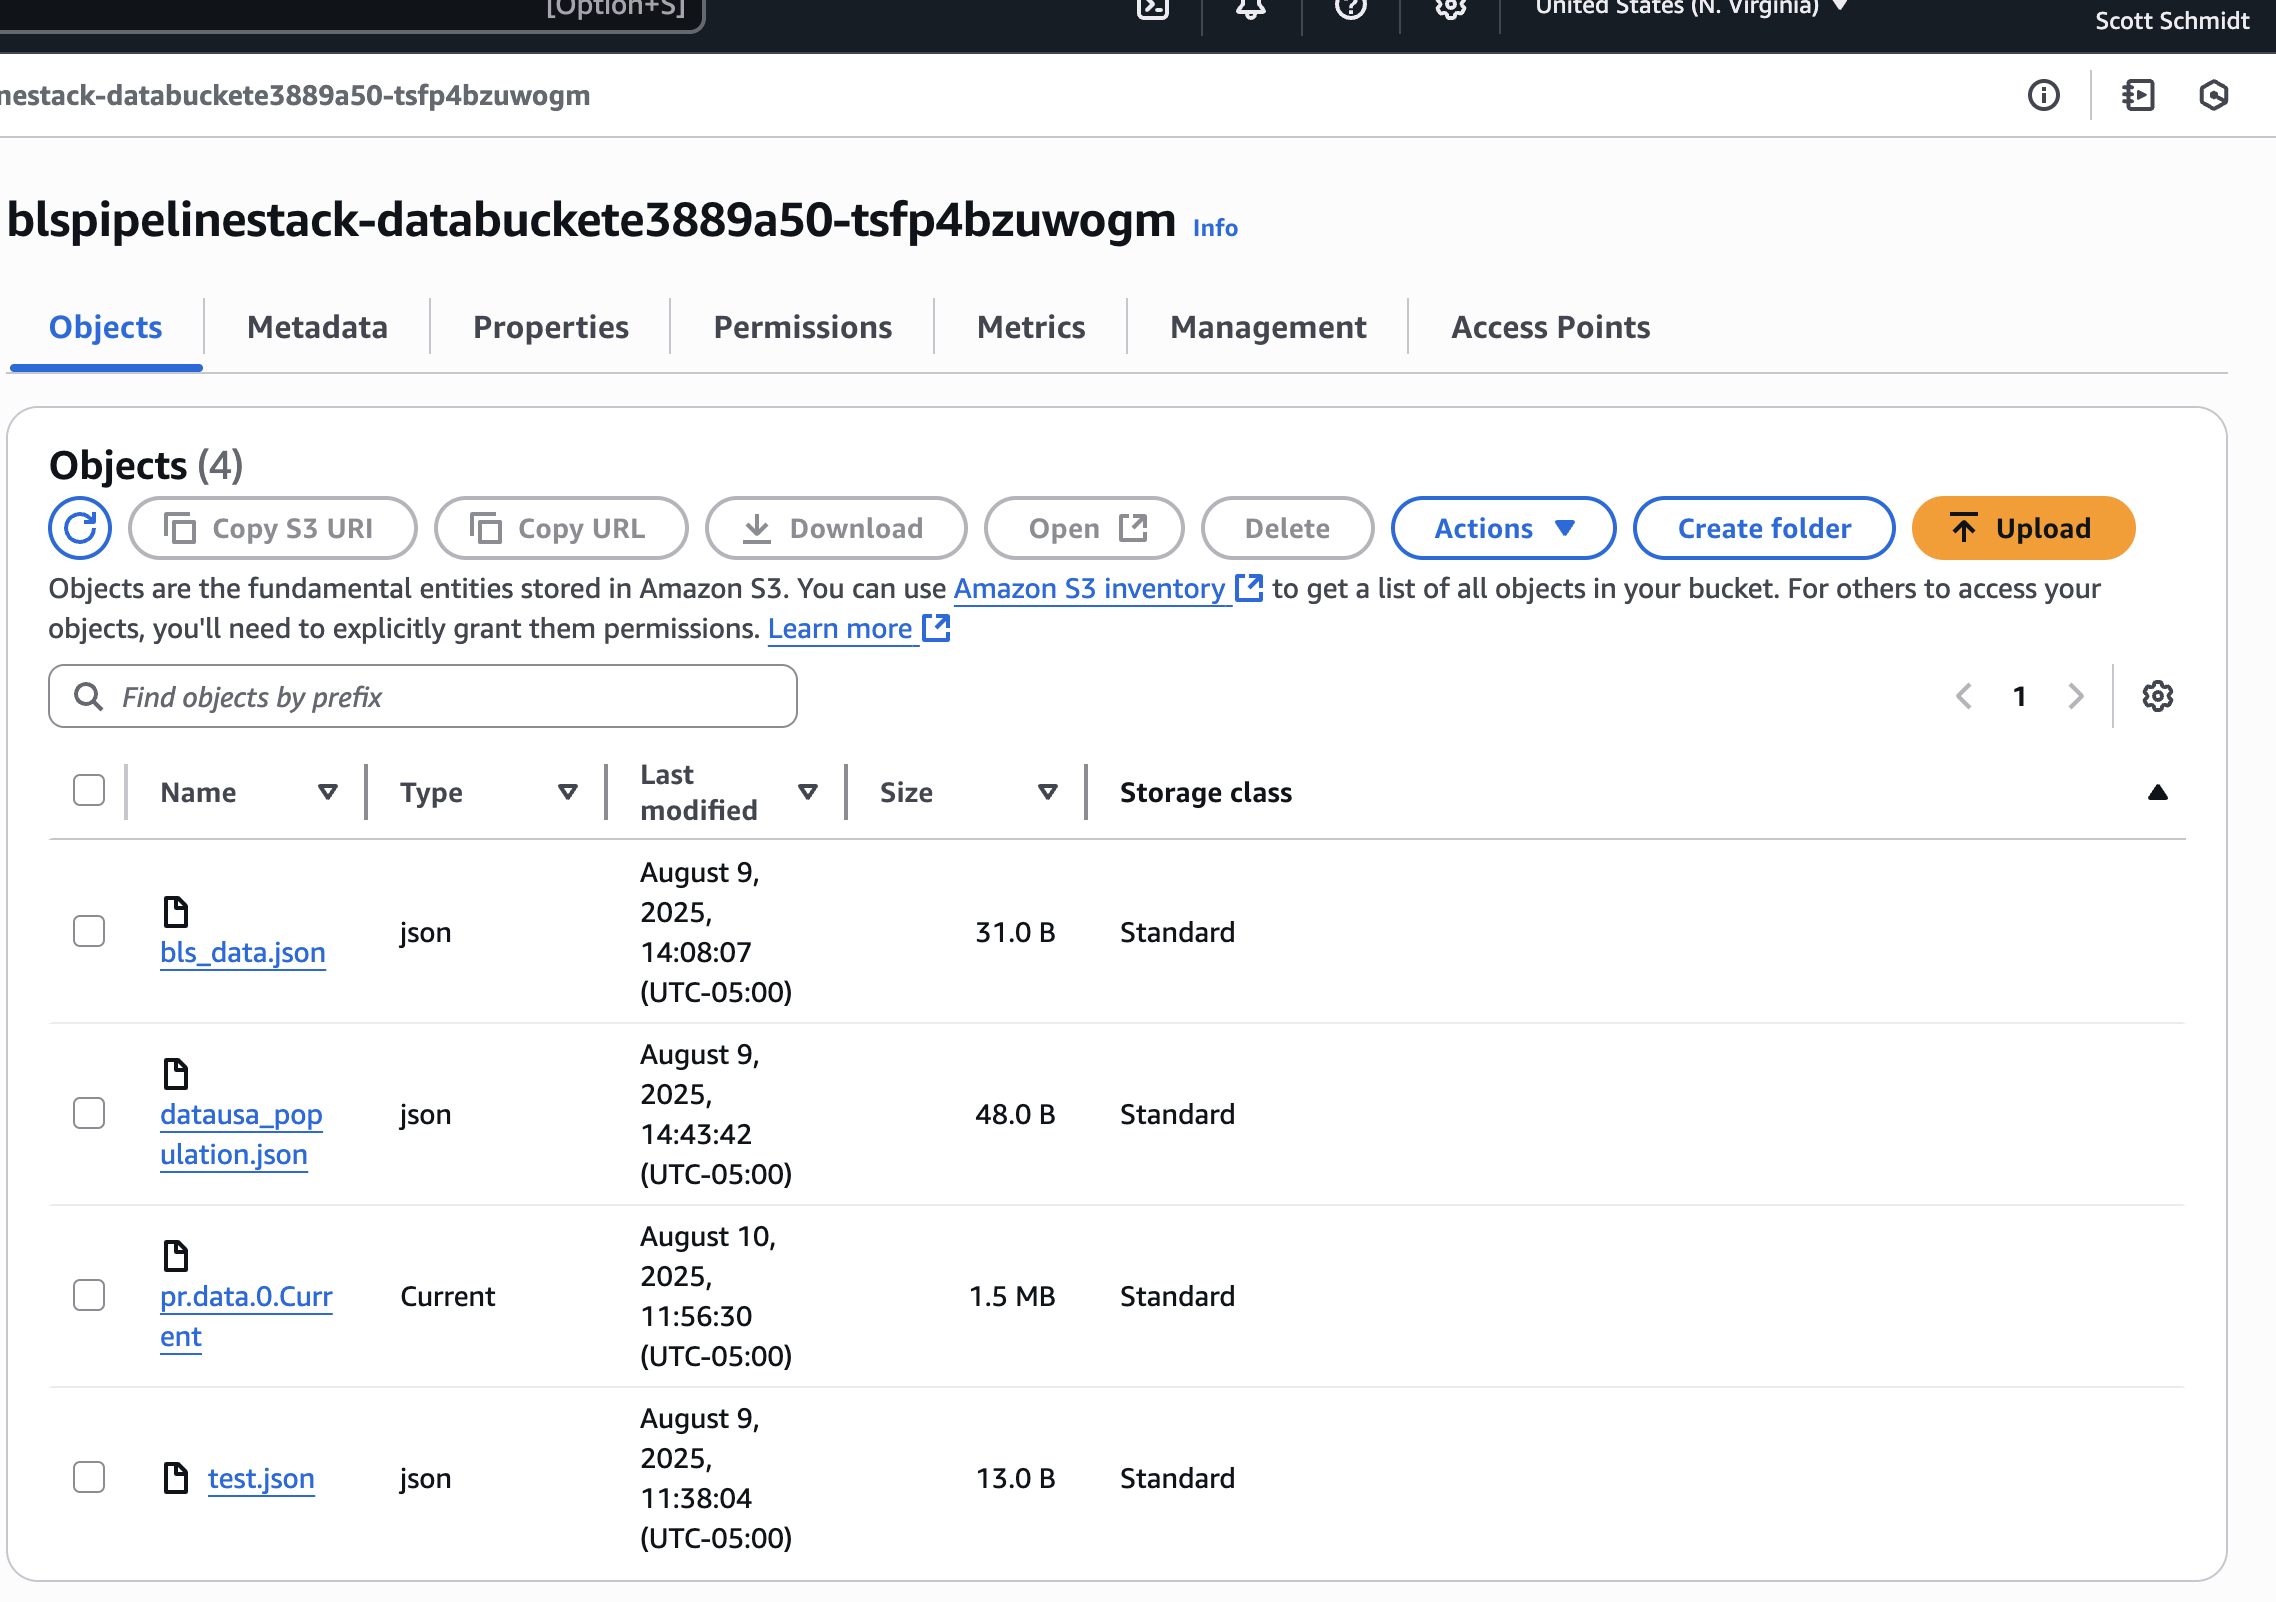
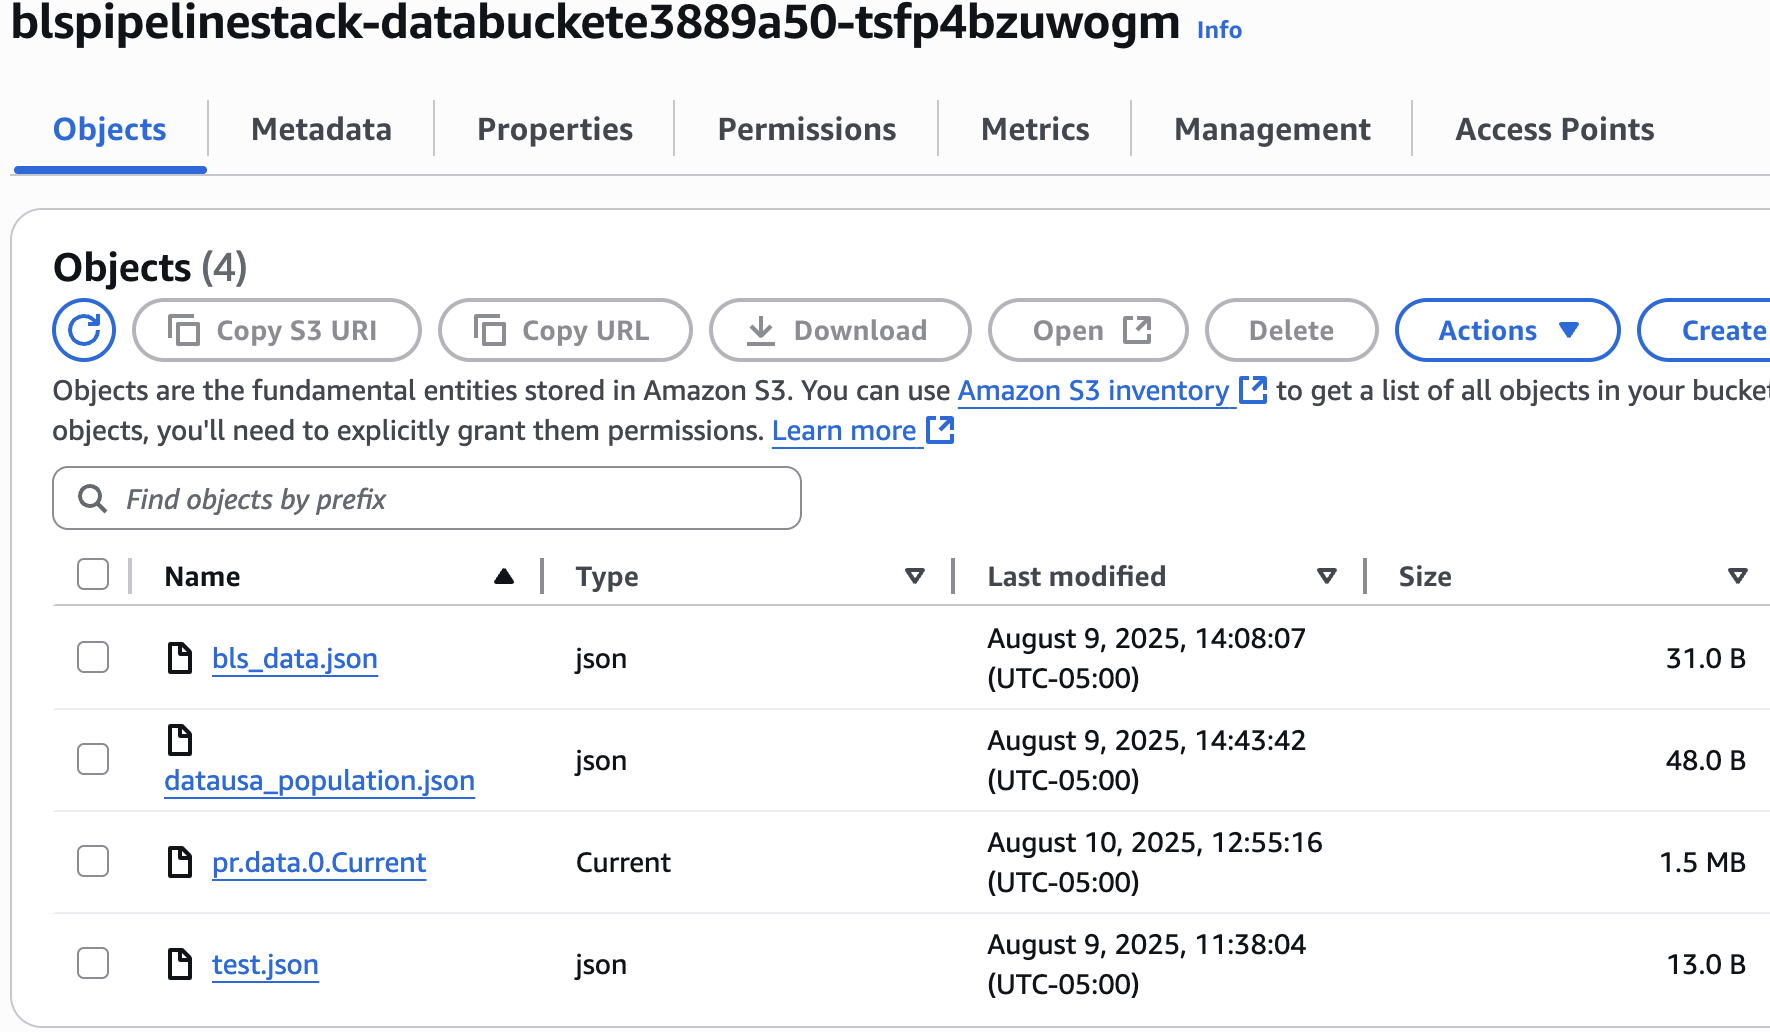
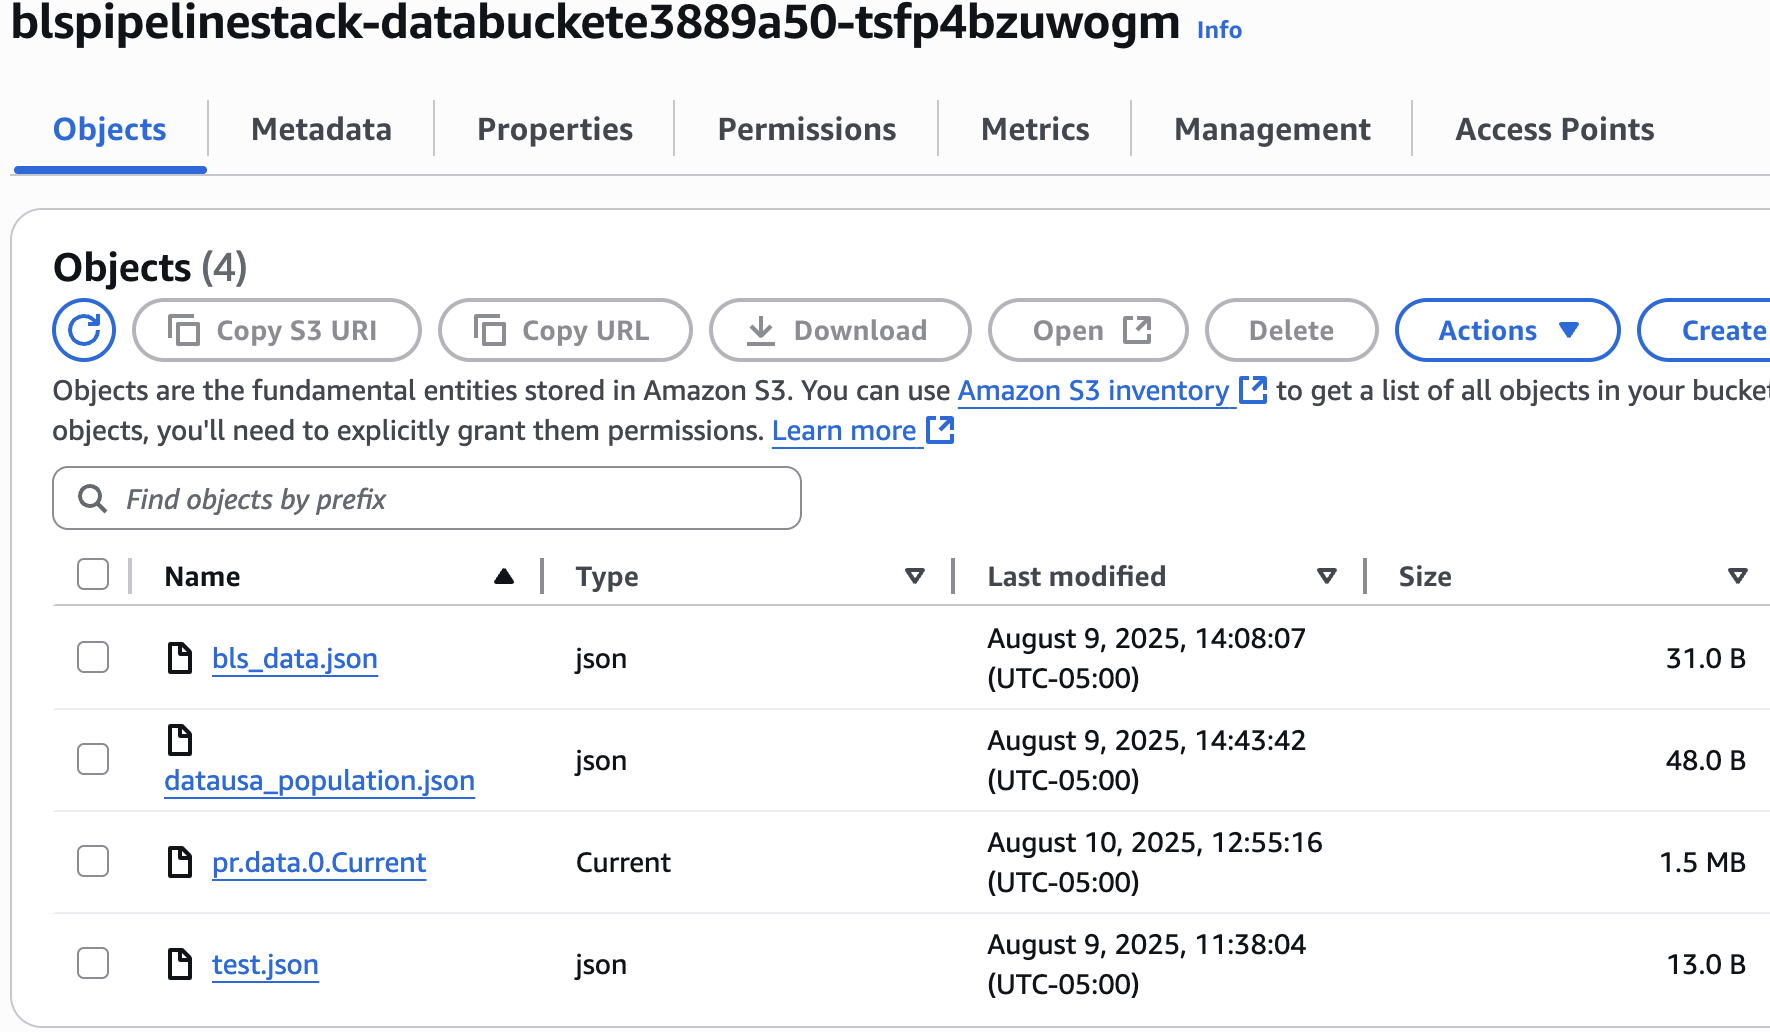
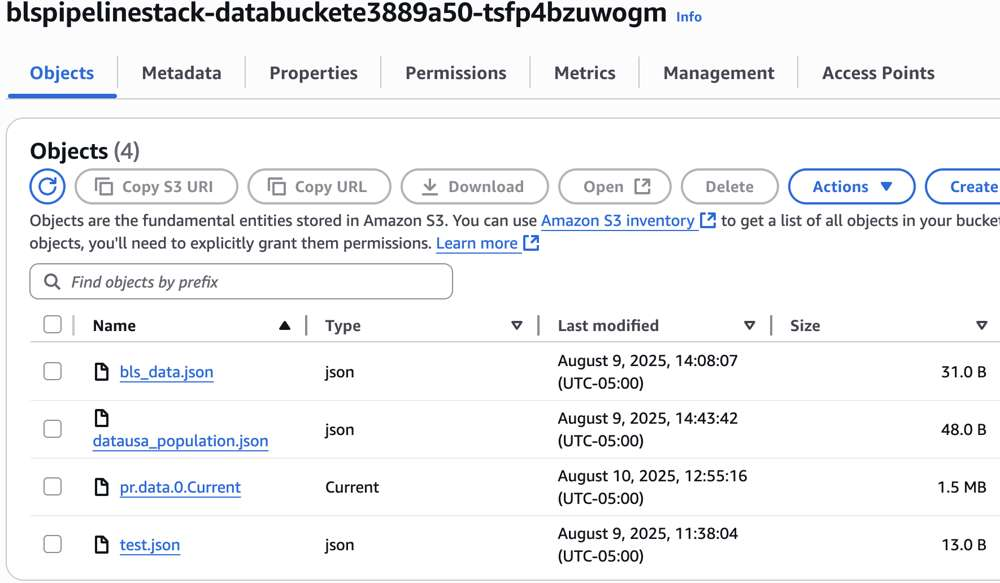
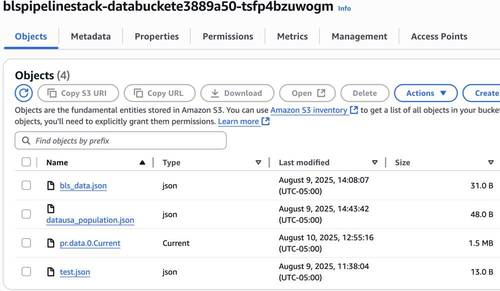

## CloudShell CDK Deployment Log
* ARN = AWS’s globally unique ID for a resource (sanitized: account ID + stack ID masked)
* Stack ID = unique CloudFormation stack identifier (masked with ********)

Below is the successful `npx aws-cdk deploy` output from AWS CloudShell:

BlsPipelineStack (no changes)
Deployment time: 1.21s
Stack ARN:
arn:aws:cloudformation:us-east-1:<account-id>:stack/BlsPipelineStack/********************************

## Lambda Ingestion Smoke Test
Ran the BlsIngestFn Lambda (smoke test to make sure it is alive)
This pulls the datasets and drop them in S3. AWS replied 200, which means success.

```bash
# Get Lambda function name from CloudFormation
INGEST_FN=$(aws cloudformation list-stack-resources \
  --stack-name BlsPipelineStack \
  --query "StackResourceSummaries[?ResourceType=='AWS::Lambda::Function' && contains(LogicalResourceId, 'BlsIngestFn')].PhysicalResourceId" \
  --output text)

# Trigger ingestion Lambda
aws lambda invoke --function-name "$INGEST_FN" /dev/stdout --region $AWS_DEFAULT_REGION

{"ok": true}
"StatusCode": 200,
"ExecutedVersion": "$LATEST"

#### Quick Reference
- CDK vs CloudFormation – CDK lets you write your AWS setup as code, while CloudFormation uses templates.  
  CDK turns your code into a CloudFormation template so AWS can build the resources.

- CloudShell – AWS’s terminal so you can run commands without installing anything locally.

- Lambda triggers –  
  - CloudWatch → runs things on a schedule (like daily ingestion)  
  - S3 events → run actions when new files are uploaded  
  - SQS events → process messages in a queue one by one

- S3 keys – The file path after the bucket name
     
#### Conclusion
That wraps up Part 4 – Infrastructure as Code & the automated pipeline.

Here’s what we confirmed:
The stack deployed successfully with no errors.
The ingestion Lambda (combining Parts 1 & 2) ran and pulled the data.
New uploads to S3 triggered the SQS queue as expected.
The reporting Lambda processed those messages and logged the results.
Final datasets are safely stored in S3 (see screenshot above).

[View GitHub Repository with All Parts](https://github.com/ScottySchmidt/AWS_DataEngineer_API)